In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


<ipython-input-4-7686a4d0c931>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

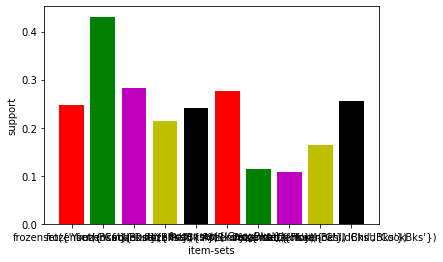

In [4]:
#Apriori Algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(book,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [5]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [6]:
#To eliminate Redudancy in Rules  
def to_list(i):
    return (sorted(list(i)))

In [7]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [8]:
ma_X = ma_X.apply(sorted)

In [9]:
rules_sets = list(ma_X)

In [10]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [11]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [12]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
264,"(ItalCook, GeogBks)",(CookBks),0.0640,0.4310,0.0640,1.000000,2.320186,0.036416,inf
258,"(ItalCook, ArtBks)",(CookBks),0.0565,0.4310,0.0565,1.000000,2.320186,0.032148,inf
108,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
34,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
288,"(RefBks, ArtBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
210,"(YouthBks, GeogBks)",(ArtBks),0.1205,0.2410,0.0650,0.539419,2.238253,0.035960,1.647919
222,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
204,"(YouthBks, RefBks)",(GeogBks),0.0965,0.2760,0.0570,0.590674,2.140122,0.030366,1.768759
186,"(YouthBks, RefBks)",(DoItYBks),0.0965,0.2820,0.0580,0.601036,2.131334,0.030787,1.799662


In [13]:
frequent_itemsets=apriori(book,min_support=0.07,use_colnames=True,max_len=3)

In [14]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [15]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [16]:
rules1 = rules [['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules1

,antecedents,consequents,support,confidence,lift
0,(YouthBks),(ChildBks),0.165,0.666667,1.576044
1,(ChildBks),(YouthBks),0.165,0.390071,1.576044
2,(ChildBks),(CookBks),0.256,0.605201,1.404179
3,(CookBks),(ChildBks),0.256,0.593968,1.404179
4,(ChildBks),(DoItYBks),0.184,0.434988,1.542511
...,...,...,...,...,...
203,"(GeogBks, DoItYBks)",(ArtBks),0.073,0.550943,2.286072
204,"(ArtBks, DoItYBks)",(GeogBks),0.073,0.591093,2.141642
205,(GeogBks),"(ArtBks, DoItYBks)",0.073,0.264493,2.141642
206,(ArtBks),"(GeogBks, DoItYBks)",0.073,0.302905,2.286072


In [17]:
rules2 = rules1 [rules1 ['confidence'] >=1 ]
rules2

,antecedents,consequents,support,confidence,lift
32,(ItalCook),(CookBks),0.1135,1.0,2.320186
100,"(ItalCook, ChildBks)",(CookBks),0.0850,1.0,2.320186


In [21]:
rules3 = rules1 [rules1 ['support'] >= 0.2 ]
rules3

,antecedents,consequents,support,confidence,lift
2,(ChildBks),(CookBks),0.256,0.605201,1.404179
3,(CookBks),(ChildBks),0.256,0.593968,1.404179


In [29]:
rules4 = rules1 [ (rules1 ['lift'] >= 0.1) &
      (rules1 ['confidence'] >= 0.3) ]
rules4

,antecedents,consequents,support,confidence,lift
0,(YouthBks),(ChildBks),0.1650,0.666667,1.576044
1,(ChildBks),(YouthBks),0.1650,0.390071,1.576044
2,(ChildBks),(CookBks),0.2560,0.605201,1.404179
3,(CookBks),(ChildBks),0.2560,0.593968,1.404179
4,(ChildBks),(DoItYBks),0.1840,0.434988,1.542511
...,...,...,...,...,...
200,(ArtBks),"(GeogBks, CookBks)",0.1035,0.429461,2.230964
202,"(GeogBks, ArtBks)",(DoItYBks),0.0730,0.572549,2.030316
203,"(GeogBks, DoItYBks)",(ArtBks),0.0730,0.550943,2.286072
204,"(ArtBks, DoItYBks)",(GeogBks),0.0730,0.591093,2.141642


In [30]:
rules5 = rules1 [ (rules1 ['support'] <= 0.2) &
      (rules1 ['confidence'] >= 0.5) ] 
rules5

,antecedents,consequents,support,confidence,lift
0,(YouthBks),(ChildBks),0.1650,0.666667,1.576044
5,(DoItYBks),(ChildBks),0.1840,0.652482,1.542511
6,(RefBks),(ChildBks),0.1515,0.706294,1.669725
8,(ArtBks),(ChildBks),0.1625,0.674274,1.594028
10,(GeogBks),(ChildBks),0.1950,0.706522,1.670264
...,...,...,...,...,...
197,"(GeogBks, CookBks)",(ArtBks),0.1035,0.537662,2.230964
198,"(ArtBks, CookBks)",(GeogBks),0.1035,0.619760,2.245509
202,"(GeogBks, ArtBks)",(DoItYBks),0.0730,0.572549,2.030316
203,"(GeogBks, DoItYBks)",(ArtBks),0.0730,0.550943,2.286072
